In [1]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [14]:
def read(file):
    with open(file) as f:
        dpd, z = [], []
        for sor in f: # így iterálhatunk végig egy adatfolyamon vagy file-on
            if sor[0]!='%': # file-ban lévő komment kiszedése
                z.append( float(sor.split()[0]) ) #nA
                dpd.append( float(sor.split()[1]) ) #nm
                
    return dpd, z

def lin(x, a, b):
    return a*x + b

def Ered(x, a, b, c):
    #return (4/3) * a * sqrt(R*(x - b)**3)
    return a * (x - b)**(3/2) + c  #y irányú eltolással egy 10-es szorzóval nagyobb eredméynt kapok

def linfig(x, y, x2, param, name):
    X = linspace(min(x), x2+200, 1000)
    plot(x, y, 'bo', markersize = 1, label = 'adatok')
    plot(X, lin(X, *param), color = 'orange', label = 'fit')
    #ylim(0, 500)
    ylabel(r'$D_{pd}$[nm]', fontsize = 15)
    xlabel('Z[nm]', fontsize = 15)
    legend()
    savefig(name)
    show()
    
def linill(x, y, x2, name):
    popt,pcov=curve_fit(lin, x[(x<x2)], y[(x<x2)]) # az illesztés elvégzése a kijelölt részre
    perr = sqrt(diag(pcov))
    print('egyenes: a, b +- err\n', popt, '+-', perr)
    s = abs(1 / popt[0])
    serr = abs(perr[0] / (popt[0]**2))
    #s = 1 / popt[0]
    #serr = perr[0] / (popt[0]**2)
    
    linfig(x, y, x2, popt, name)
    
    return s, serr

def traf(x, y, x2, name):
    S, Serr = linill(x, y, x2, name)
    D = y * S  # y a Dpd
    Derr = y * Serr  #mennyi x és y hibája?
    dt = x - D # x a Z
    dterr = Derr
    Ft = k * D
    Fterr = k * Derr
    plot(dt, Ft, 'bo', markersize = 1)
    xlabel('d[nm]', fontsize = 15)
    ylabel('F[nN]', fontsize = 15)
    ylim(0, 500)
    print('S =', S, '+-', Serr)
    
    return Ft, Fterr, dt, dterr
    
def redill(x, y, xerr, yerr, x2, name):
    popt, pcov = curve_fit(Ered, x[x<x2], y[x<x2], sigma = yerr[x<x2])
    perr = sqrt(diag(pcov))
    print('Er, d0 +- err\n', popt, '+-', perr)
    
    X = linspace(min(x), max(x), 1000)
    errorbar(x, y, yerr = yerr, xerr = xerr, linestyle = '', marker = '.', color = 'blue', markersize = 2, label = 'adatok')
    plot(X, Ered(X, *popt), color = 'orange', label = 'fit')
    xlabel('d[nm]', fontsize = 15)
    ylabel('F[nN]', fontsize = 15)
    ylim(0, max(y))
    legend()
    savefig(name)
    show()
    
    return popt[0], perr[0], popt[1], perr[1]

def Young(x, y, x1, x2, name):
    #x = array(x)
    #y = array(y)
    
    popt, pcov = curve_fit(Ered, x[(x>x1)*(x<x2)], y[(x>x1)*(x<x2)])
    perr = sqrt(diag(pcov))
    
    pr = linspace(x1, x2+100, 1000)
    plot(x, y, 'bo', markersize = 1, label = 'adatok')
    plot(pr, Ered(pr, *popt), color = 'orange', label = 'fit')
    xlim(0, x2+100)
    ylim(0, 500)
    xlabel('d[nm]', fontsize = 15)
    ylabel('F[nN]', fontsize = 15)
    legend()
    savefig(name)
    
    
    Er = popt[0] * 3 / (4*sqrt(R))
    Ererr = perr[0] * 3 / (4*sqrt(R))
    #Er, Ererr, d0, d0err = redill(d, F, derr, Ferr, d2, nameEr)
    
    E = (1-nu**2) / ((1/Er) - ((1-nu_i**2)/E_i))
    dE = abs((Ererr/(Er**2)) * (1-nu**2) / ((1/Er) - ((1-nu_i**2)/E_i))**2)
    print('Er =', Er, '+-', Ererr)
    print('E =', E, '+-', dE)
    return E#, dE

In [3]:
k = 5 #N/m = nN/nm
nu_i = 0.064
E_i = 188 #GPa = kg/(nm s^2)
R = 50 #nm
nu = 0.37

#ezekkel a mértékegységekkel [F] = nN

In [4]:
Dpd1a, Z1a = read('plexi1a.txt')

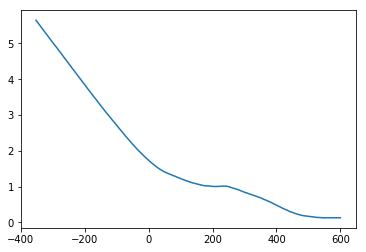

In [5]:
plot(Z1a, Dpd1a)
#xlim(-400, 0)

egyenes: a, b +- err
 [-0.01178386  1.49205988] +- [2.87250160e-06 7.40996133e-04]


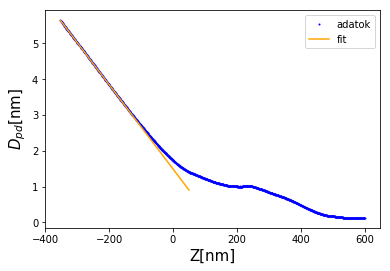

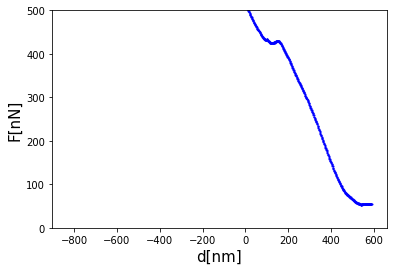

In [6]:
F1a, F1aerr, d1a, d1aerr = traf(array(Z1a), array(Dpd1a), -150, 'lin_1a.png')

(100, 200)

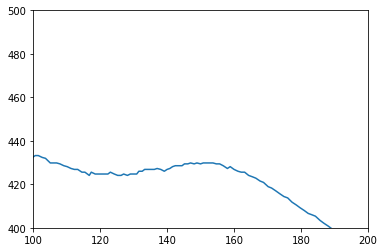

In [7]:
plot(d1a, F1a)
ylim(400, 500)
xlim(100, 200)

E = 0.0012906654051403207


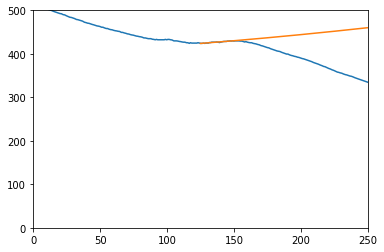

In [8]:
E1a = Young(d1a, F1a, 125, 150)

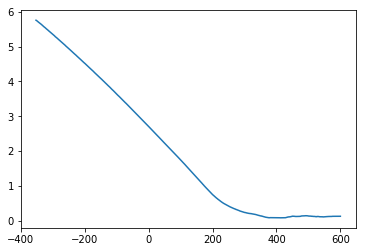

In [9]:
Dpd1b, Z1b = read('plexi1b.txt')
plot(Z1b, Dpd1b)

egyenes: a, b +- err
 [-0.00869103  2.75953035] +- [1.24800209e-05 2.54171683e-03]


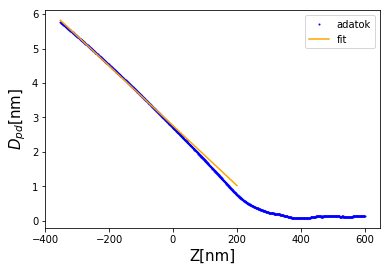

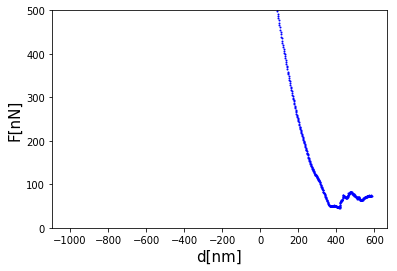

In [10]:
F1b, F1berr, d1b, d1berr = traf(array(Z1b), array(Dpd1b), 0, 'lin_1b.png')

(0, 100)

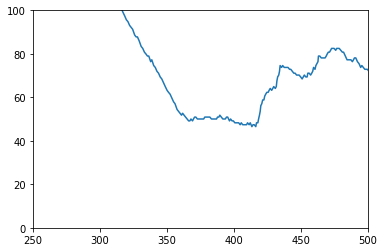

In [11]:
plot(d1b, F1b)
xlim(250, 500)
ylim(0, 100)

E = 0.006359903617331972


/home/friss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()


0.006359903617331972

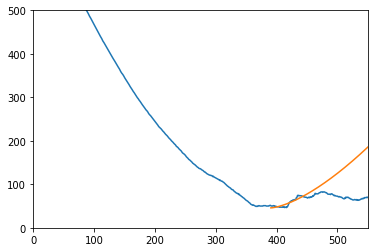

In [12]:
Young(d1b, F1b, 390, 450)

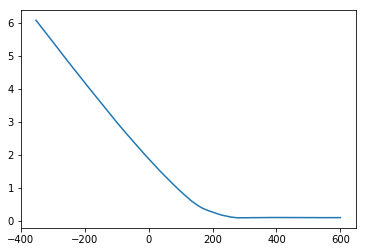

In [13]:
Dpd2a, Z2a = read('plexi2a.txt')
plot(Z2a, Dpd2a)

egyenes: a, b +- err
 [-0.01197557  1.82072592] +- [1.29057956e-05 2.62843132e-03]


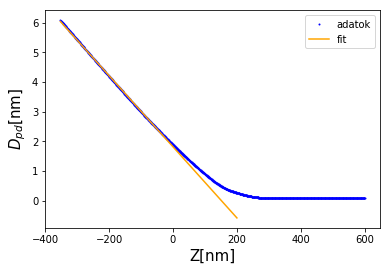

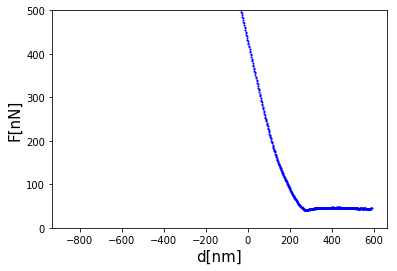

In [14]:
F2a, F2aerr, d2a, d2aerr = traf(array(Z2a), array(Dpd2a), 0, 'lin_2a.png')

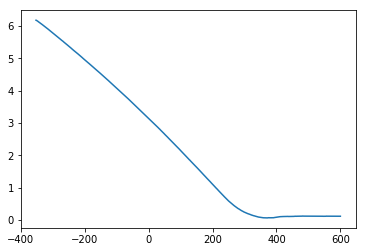

In [4]:
Dpd2b, Z2b = read('plexi2b.txt')
plot(Z2b, Dpd2b)

egyenes: a, b +- err
 [-0.00865256  3.19705121] +- [1.28200835e-05 2.61097497e-03]


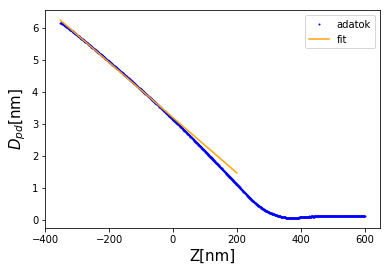

S = 115.57271144788349 +- 0.17123851773688178


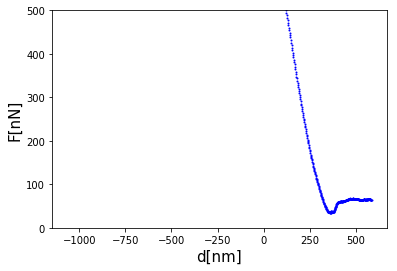

In [11]:
F2b, F2berr, d2b, d2berr = traf(array(Z2b), array(Dpd2b), 0, 'lin_2b.png')

(0, 100)

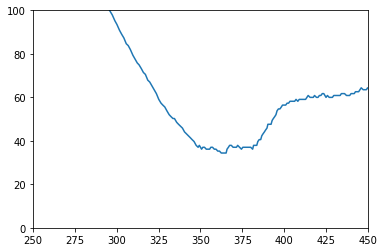

In [6]:
plot(d2b, F2b)
xlim(250, 450)
ylim(0, 100)

Er = 0.019405427736286233 +- 0.0013861075401738953
E = 0.016750546594669784 +- 0.0011965954194813402


/home/friss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()


0.016750546594669784

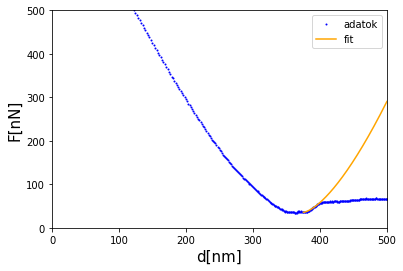

In [15]:
Young(d2b, F2b, 375, 400, 'Young2b.png')

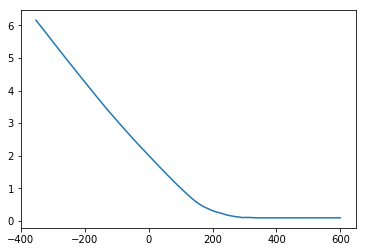

In [19]:
Dpd3a, Z3a = read('plexi3a.txt')
plot(Z3a, Dpd3a)

egyenes: a, b +- err
 [-0.01184642  1.92597935] +- [1.70231581e-05 3.46698521e-03]


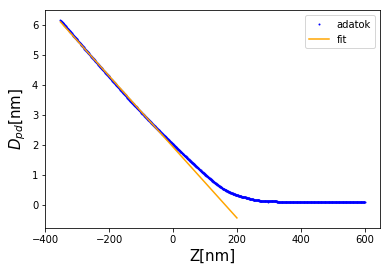

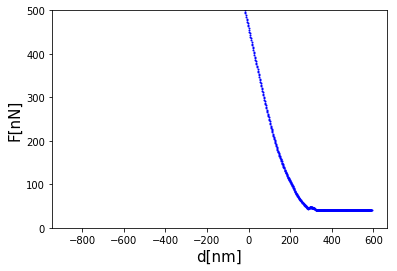

In [20]:
F3a, F3aerr, d3a, d3aerr = traf(array(Z3a), array(Dpd3a), 0, 'lin_3a.png')

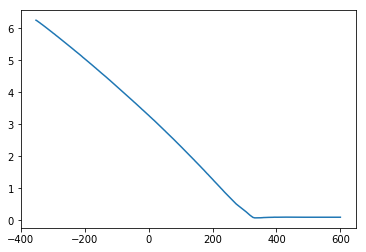

In [21]:
Dpd3b, Z3b = read('plexi3b.txt')
plot(Z3b, Dpd3b)

egyenes: a, b +- err
 [-0.00847409  3.33232352] +- [1.17859928e-05 2.40036906e-03]


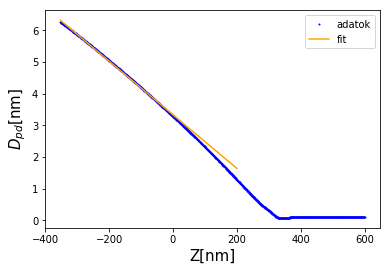

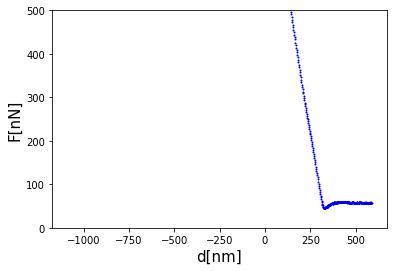

In [22]:
F3b, F3berr, d3b, d3berr = traf(array(Z3b), array(Dpd3b), 0, 'lin_3b.png')

(0, 100)

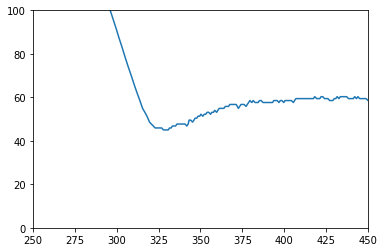

In [23]:
plot(d3b, F3b)
xlim(250, 450)
ylim(0, 100)

E = 0.002051920135750182


/home/friss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()


0.002051920135750182

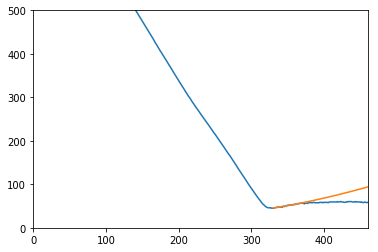

In [24]:
Young(d3b, F3b, 330, 360)